In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# p1s1   p2s2   p7s7
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel

In [3]:
ls ..\..\..\..\d03

 Volume in drive D is winBak
 Volume Serial Number is 7E87-595B

 Directory of D:\d03

11/30/18  08:50 AM    <DIR>          .
11/30/18  08:50 AM    <DIR>          ..
10/29/18  08:32 AM       862,256,324 20120816_d03_gfs05_p1r1.nc
11/12/18  10:00 PM       912,146,772 20120816_d03_gfs05_p1r3.nc
11/12/18  09:53 PM       874,728,724 20120816_d03_gfs05_p1r5.nc
10/29/18  11:51 PM       955,784,812 20120816_d03_gfs05_p2r1.nc
11/12/18  10:11 PM     1,005,675,260 20120816_d03_gfs05_p2r3.nc
11/21/18  01:57 PM       968,257,212 20120816_d03_gfs05_p2r5.nc
11/12/18  02:07 PM       862,256,324 20120816_d03_nam32_p1r1.nc
11/12/18  02:11 PM       912,146,772 20120816_d03_nam32_p1r3.nc
11/12/18  02:15 PM       874,728,724 20120816_d03_nam32_p1r5.nc
11/14/18  10:39 AM       955,784,812 20120816_d03_nam32_p2r1.nc
11/14/18  10:40 AM     1,005,675,260 20120816_d03_nam32_p2r3.nc
11/14/18  10:40 AM       968,257,212 20120816_d03_nam32_p2r5.nc
              12 File(s) 11,157,698,208 bytes
               2 Dir

In [4]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5',
           ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
expruns[1]

'20120816_d03_gfs05_p1r3'

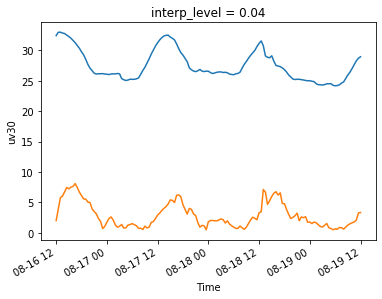

In [5]:
g1r1 = xr.open_dataset("interp30/sodar_g1r1.nc")
g1r1['tv30'][:,1].plot()
g1r1['uv30'][:,1].plot()


In [6]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,2,7,12,17,22,27,32,37,42,47]
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

wrf1 = pd.read_pickle('interp/wind_'+expruns[0]+'.pk').iloc[:,idw]
wrf2 = pd.read_pickle('interp/wind_'+expruns[1]+'.pk').iloc[:,idw]
wrf3 = pd.read_pickle('interp/wind_'+expruns[2]+'.pk').iloc[:,idw]
wrf4 = pd.read_pickle('interp/wind_'+expruns[3]+'.pk').iloc[:,idw]
wrf5 = pd.read_pickle('interp/wind_'+expruns[4]+'.pk').iloc[:,idw]
wrf6 = pd.read_pickle('interp/wind_'+expruns[5]+'.pk').iloc[:,idw]
wrf7 = pd.read_pickle('interp/wind_'+expruns[6]+'.pk').iloc[:,idw]
wrf8 = pd.read_pickle('interp/wind_'+expruns[7]+'.pk').iloc[:,idw]

drw1 = pd.read_pickle('interp/wdir_'+expruns[0]+'.pk').iloc[:,idw]
drw2 = pd.read_pickle('interp/wdir_'+expruns[1]+'.pk').iloc[:,idw]
drw3 = pd.read_pickle('interp/wdir_'+expruns[2]+'.pk').iloc[:,idw]
drw4 = pd.read_pickle('interp/wdir_'+expruns[3]+'.pk').iloc[:,idw]
drw5 = pd.read_pickle('interp/wdir_'+expruns[4]+'.pk').iloc[:,idw]
drw6 = pd.read_pickle('interp/wdir_'+expruns[5]+'.pk').iloc[:,idw]
drw7 = pd.read_pickle('interp/wdir_'+expruns[6]+'.pk').iloc[:,idw]
drw8 = pd.read_pickle('interp/wdir_'+expruns[7]+'.pk').iloc[:,idw]

tv1 = pd.read_pickle('interp/tmpv_'+expruns[0]+'.pk').iloc[:,idw]
tv2 = pd.read_pickle('interp/tmpv_'+expruns[1]+'.pk').iloc[:,idw]
tv3 = pd.read_pickle('interp/tmpv_'+expruns[2]+'.pk').iloc[:,idw]
tv4 = pd.read_pickle('interp/tmpv_'+expruns[3]+'.pk').iloc[:,idw]
tv5 = pd.read_pickle('interp/tmpv_'+expruns[4]+'.pk').iloc[:,idw]
tv6 = pd.read_pickle('interp/tmpv_'+expruns[5]+'.pk').iloc[:,idw]
tv7 = pd.read_pickle('interp/tmpv_'+expruns[6]+'.pk').iloc[:,idw]
tv8 = pd.read_pickle('interp/tmpv_'+expruns[7]+'.pk').iloc[:,idw]

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate()
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate()
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate()

sodarw1 = sread_w.iloc[:,ids][t1:t2].interpolate()
sodarw2 = sread_w.iloc[:,ids][t2:t3].interpolate()
sodarw3 = sread_w.iloc[:,ids][t3:t4].interpolate()
sodard1 = sread_d.iloc[:,ids][t1:t2].interpolate()
sodard2 = sread_d.iloc[:,ids][t2:t3].interpolate()
sodard3 = sread_d.iloc[:,ids][t3:t4].interpolate()
sodart1 = sread_t.iloc[:,ids][t1:t2].interpolate()
sodart2 = sread_t.iloc[:,ids][t2:t3].interpolate()
sodart3 = sread_t.iloc[:,ids][t3:t4].interpolate()

In [7]:
wrf8.values

array([[2.3201897, 2.3696616, 2.4688578, ..., 2.334204 , 2.2696514,
        2.2286146],
       [4.2500844, 4.3803163, 4.5605874, ..., 4.027596 , 3.9096508,
        3.789767 ],
       [6.291115 , 6.548837 , 6.937486 , ..., 6.3615975, 6.20767  ,
        6.049946 ],
       ...,
       [1.8796774, 1.8992319, 1.8892771, ..., 1.2568973, 1.2113518,
        1.2518551],
       [2.4327958, 2.5188901, 2.64164  , ..., 2.436226 , 2.4037864,
        2.3860118],
       [3.106022 , 3.2431898, 3.4568152, ..., 3.3160126, 3.257429 ,
        3.1953533]], dtype=float32)

In [8]:
def panelPlot(level):
    skey = sodarw1.keys()[level]
    wkey = wrf1.keys()[level]*1000
    fig, axs = plt.subplots(2, 3, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    for axl in range(0,2):
        for axc in range(0,3):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Virtual Temperature')

    ax = axs[0, 0]
    x1 = sodarw1.index
    ax.plot(x1, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t1:t2].iloc[:,level], label=expnames[0])
    ax.plot(wrf3[t1:t2].iloc[:,level], label=expnames[2])
    ax.plot(wrf6[t1:t2].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[0, 1]
    x2 = sodarw2.index
    ax.plot(x2, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t2:t3].iloc[:,level], label=expnames[0])
    ax.plot(wrf3[t2:t3].iloc[:,level], label=expnames[2])
    ax.plot(wrf6[t2:t3].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[0, 2]
    x3 = sodarw3.index
    ax.plot(x3, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t3:t4].iloc[:,level], label=expnames[0])
    ax.plot(wrf3[t3:t4].iloc[:,level], label=expnames[2])
    ax.plot(wrf6[t3:t4].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[1, 0]
    ax.plot(x1, sodart1.iloc[:,level], label='sodarTV')
    ax.plot(tv1[t1:t2].iloc[:,level], label=expnames[0])
    ax.plot(tv3[t1:t2].iloc[:,level], label=expnames[2])
    ax.plot(tv6[t1:t2].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[1, 1]
    ax.plot(x2, sodart2.iloc[:,level], label='sodarTV');
    ax.plot(tv1[t2:t3].iloc[:,level], label=expnames[0])
    ax.plot(tv3[t2:t3].iloc[:,level], label=expnames[2])
    ax.plot(tv6[t2:t3].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[1, 2]
    ax.plot(x3, sodart3.iloc[:,level], label='sodarTV');
    ax.plot(tv1[t3:t4].iloc[:,level], label=expnames[0])
    ax.plot(tv3[t3:t4].iloc[:,level], label=expnames[2])
    ax.plot(tv6[t3:t4].iloc[:,level], label=expnames[5])
    ax.legend();
    plt.suptitle('Wind Speed '+skey);
    
    print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

3 spd_150 150.0


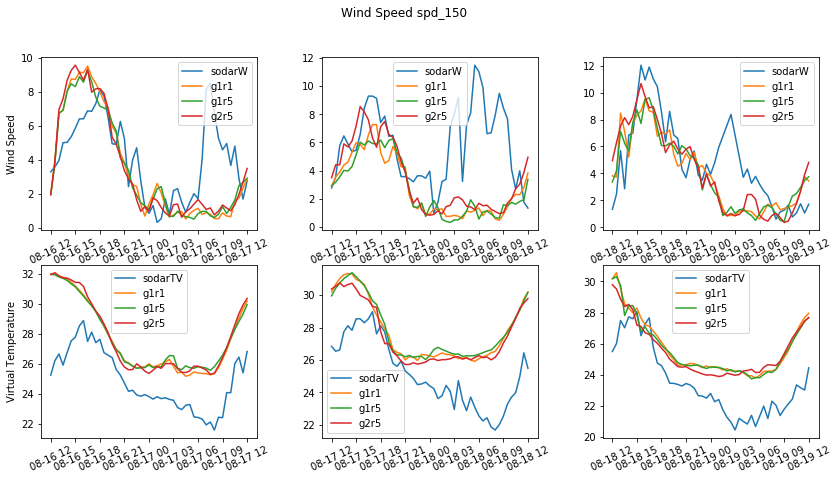

In [9]:
panelPlot(level=3)
# d17 08h
# d18 06h

In [10]:
def panelPlot2(level):
    skey = sodarw1.keys()[level]
    wkey = wrf1.keys()[level]*1000
    fig, axs = plt.subplots(2, 3, figsize=(15,9))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.15, hspace=0.3)
    for axl in range(0,2):
        for axc in range(0,3):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Wind Speed')
    lw = 0.6
    ax = axs[0, 0]
    ax.set_ylim([0, 12])
    ax.plot(sodarw1.index, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t1:t2].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t1:t2].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t1:t2].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t1:t2].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([0, 12])
    ax.plot(sodarw2.index, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t2:t3].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t2:t3].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t2:t3].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t2:t3].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 2]
    ax.set_ylim([0, 12])
    ax.plot(sodarw3.index, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t3:t4].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t3:t4].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t3:t4].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t3:t4].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[1, 0]
    ax.set_ylim([0, 12])
    ax.plot(sodarw1.index, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t1:t2].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t1:t2].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t1:t2].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t1:t2].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([0, 12])
    ax.plot(sodarw2.index, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t2:t3].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t2:t3].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t2:t3].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t2:t3].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 2]
    ax.set_ylim([0, 12])
    ax.plot(sodarw3.index, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t3:t4].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t3:t4].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t3:t4].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t3:t4].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    plt.suptitle('Wind Speed '+skey);
    # expnames = [1'gp1r1', 2'gp1r5', 3'np1r1', 4'np1r3',
    #             5'np1r5', 6'np7r1', 7'np7r3', 8'np7r5']

    print(level, skey, wkey)
    plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [11]:
def ProfilesPanel1(tt):
    fig, axs = plt.subplots(1, 2, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.2)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Wind Speed')
    axs[1].set_xlabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
 
    ts = wrf2.iloc[tt,:].name
    d = ts.strftime('d%d-%H:%M')
    
    ax = axs[0]
    ax.plot(sodarw.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color='b')
    vdir = np.radians(sodard.iloc[tt,:])
    xx, uu, vv = sodarw.iloc[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1.iloc[tt,:], plot_levs, label=expnames[0], ls='-', color='0.2')
    ax.plot(wrf2.iloc[tt,:], plot_levs, label=expnames[1], ls='--', color='0.2')
    ax.plot(wrf3.iloc[tt,:], plot_levs, label=expnames[2], ls='-.', color='0.2')
    ax.plot(wrf4.iloc[tt,:], plot_levs, label=expnames[3], ls=':', color='0.2')
    ax.plot(wrf5.iloc[tt,:], plot_levs, label=expnames[4], ls='--', color='0.4')      
    ax.plot(wrf6.iloc[tt,:], plot_levs, label=expnames[5], ls='--', color='0.4')
    ax.plot(wrf7.iloc[tt,:], plot_levs, label=expnames[6], ls='-.', color='0.4')
    ax.plot(wrf8.iloc[tt,:], plot_levs, label=expnames[7], ls=':', color='0.4')
    vdir = np.radians(drw1.iloc[tt,:])
    ax.quiver(wrf1.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.4')        
    vdir = np.radians(drw4.iloc[tt,:])
    ax.quiver(wrf4.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.6')        
    vdir = np.radians(drw7.iloc[tt,:])
    ax.quiver(wrf7.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.8')        
    ax.legend()

    ax = axs[1]
    ax.plot(sodart.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color='b')        
    ax.plot(tv1.iloc[tt,:], plot_levs, label=expnames[0], ls='-', color='0.2')
    ax.plot(tv2.iloc[tt,:], plot_levs, label=expnames[1], ls='--', color='0.2')
    ax.plot(tv3.iloc[tt,:], plot_levs, label=expnames[2], ls='-.', color='0.2')
    ax.plot(tv4.iloc[tt,:], plot_levs, label=expnames[3], ls=':', color='0.2')
    ax.plot(tv5.iloc[tt,:], plot_levs, label=expnames[4], ls='-', color='0.4')
    ax.plot(tv6.iloc[tt,:], plot_levs, label=expnames[5], ls='--', color='0.4')
    ax.plot(tv7.iloc[tt,:], plot_levs, label=expnames[6], ls='-.', color='0.4')
    ax.plot(tv8.iloc[tt,:], plot_levs, label=expnames[7], ls=':', color='0.4')
    ax.legend()

    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [12]:
def ProfilesPanel2(tstart,tend,deltat,wrfrun):
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    axs[0].set_ylabel('m AGL')
    axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Wind Speed')
    axs[1].set_xlabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
    marker=['x', 'o', '^']
    color=['k','r','b','g']
    i=0
    for tt in np.arange(tstart,tend,deltat):
        ax = axs[0]
        ts = eval('wrfrun.iloc[tt,:].name')
        d = ts.strftime('d%d-%H:%M')
        ax.plot(wrf1.iloc[tt,:], plot_levs, label='WRF '+str(d), ls='dashed', color=color[i])
        #vdir = np.radians(drw1.iloc[tt,:])    
        #ax.quiver(wrf1.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='k')
        
        ax.plot(sodarw.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color=color[i])
        #vdir = np.radians(drw1.iloc[tt,:])    
        #ax.quiver(sodarw.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='k')
        ax.legend()
        
        ax = axs[1]
        ax.plot(tv1.iloc[tt,:], plot_levs, label='WRF '+str(d), ls='dashed', color=color[i])
        ax.plot(sodart.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color=color[i])        
        ax.legend()
        i=i+1
    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [13]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel

In [14]:
ll=21
lncn=22

In [15]:
def wrf30m(f,tt,ztop):
    #f = 'exp6link/20120816_d03_gfs05_p1r1.nc'
    ncfile = Dataset(f)
    #tt = 1
    #ztop = 15
    utc2loc = np.timedelta64(6,'h')
    wrftime = getvar(ncfile, "times", timeidx=tt*3)
    time30 = pd.to_datetime(wrftime.values)-utc2loc

    tts = np.arange(3*tt-2,3*tt+1,1)
    ncfile = Dataset(f)
    uv, wd, tv, ua, va, wa, zh, p = {}, {}, {}, {}, {}, {}, {}, {}
    for ii in range(3):
        p[ii] = getvar(ncfile, "p", units="hPa", timeidx=tts[ii])[:ztop,ll,:]
        zh[ii] = getvar(ncfile, "z", units="m", timeidx=tts[ii])[:ztop,ll,:]
        ua[ii] = getvar(ncfile, "ua", units="m s-1", timeidx=tts[ii])[:ztop,ll,:]
        va[ii] = getvar(ncfile, "va", units="m s-1", timeidx=tts[ii])[:ztop,ll,:]
        wa[ii] = getvar(ncfile, "wa", units="m s-1", timeidx=tts[ii])[:ztop,ll,:]
        uv[ii], wd[ii] = getvar(ncfile, "uvmet_wspd_wdir", units="m s-1", timeidx=tts[ii])
        tv[ii] = getvar(ncfile, "tv", units="degC", timeidx=tts[ii])
        ii=ii+1

    p30 = (p[0]+p[1]+p[2])/3
    p30['Time'] = time30
    z30 = (zh[0]+zh[1]+zh[2])/3
    z30['Time'] = time30

    ua30 = (ua[0]+ua[1]+ua[2])/3
    ua30['Time'] = time30
    va30 = (va[0]+va[1]+va[2])/3
    va30['Time'] = time30
    wa30 = (wa[0]+wa[1]+wa[2])/3
    wa30['Time'] = time30

    uv30 = (uv[0]+uv[1]+uv[2])/3
    uv30['Time'] = time30
    wd30 = (wd[0]+wd[1]+wd[2])/3
    wd30['Time'] = time30
    
    tv30 = (tv[0]+tv[1]+tv[2])/3
    tv30['Time'] = time30
    
    return uv30, wd30, tv30, p30, z30, ua30, va30, wa30


In [16]:
f='../../../../../d03/20120816_d03_gfs05_p1r1.nc'
uv30, wd30, tv30, p30, z30, ua30, va30, wa30 = wrf30m(f=f,tt=2, ztop=15)


In [17]:
def hovlon(tt,ln,ztop):
    plt.figure(figsize=(14,6))

    p = p30
    z = z30
    uhov = ua30
    vhov = va30
    whov = wa30
    zhov = z30
    ltcn = uv.coords['XLAT'][:,ln]
    LATS, ZHOV = np.meshgrid(ltcn,np.arange(ztop))

    wdhv = np.sqrt(np.power(vhov,2)+np.power(whov,2))
    vmin, vmax = 0, 8
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LATS, zhov, wdhv, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
  
    lath = uv.coords['XLAT'][:,ln]
    ht_850 = interplevel(z, p, 850)[:,ln]
    ht_900 = interplevel(z, p, 900)[:,ln]
    ht_925 = interplevel(z, p, 925)[:,ln]
    ht_950 = interplevel(z, p, 950)[:,ln]
    plt.plot(lath, ht_950, color='c', label='950 hPa')
    plt.plot(lath, ht_900, color='k', label='900 hPa')
    plt.plot(lath, ht_850, color='y', label='850 hPa')
    plt.legend()

    plt.quiver(LATS, zhov,vhov,whov)
    timestr = uv.Time.values #- np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d %H:%M')
    lons = uv.coords['XLONG'][ln,ln].values
    plt.gca().invert_xaxis()
    plt.title('Wind Speed Contours for LLJ\n at LON '+str("%0.2f" %(lons))+'  Valid at '+d);

In [18]:
def hovtlon(tt,ln,ztop):
    plt.figure(figsize=(14,6))
    tv = tv30
    uv = uv30
    p = p30
    z = z30
    uhov = -ua30
    vhov = -va30
    whov = wa30
    zhov = z30[:ztop]
    
    ltcn = uv.coords['XLAT'][:,ln]
    LATS, ZHOV = np.meshgrid(ltcn,np.arange(ztop))

    tvhv = tv[:ztop,ln,:]
    vmin, vmax = 20, 36
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LATS, zhov, tvhv, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
    CS = plt.contour(LATS, zhov, tvhv, colors='b')
    plt.clabel(CS, inline=1, fmt='%2.1f', colors='b', fontsize=10)
    
    #lath = uv.coords['XLAT'][:,ln]
    #ht_850 = interplevel(z, p, 850)[:,ln]
    #ht_900 = interplevel(z, p, 900)[:,ln]
    #ht_925 = interplevel(z, p, 925)[:,ln]
    #ht_950 = interplevel(z, p, 950)[:,ln]
    #plt.plot(lath, ht_950, color='c', label='950 hPa')
    #plt.plot(lath, ht_900, color='k', label='900 hPa')
    #plt.plot(lath, ht_850, color='y', label='850 hPa')
    #plt.legend()

    plt.quiver(LATS, zhov,vhov,whov)
    timestr = uv.Time.values #- np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d %H:%M')
    lons = uv.coords['XLONG'][ln,ln].values
    plt.gca().invert_xaxis()

    plt.title('Virtual Temp Contours for LLJ\n at LON '+str("%0.2f" %(lons))+'  Valid at '+d);

In [19]:
def hovtslon(ln,ztop):
    plt.figure(figsize=(14,6))
    tv = tv30
    uv = uv30
    p = p30
    z = z30
    uhov = ua30
    vhov = va30
    whov = wa30
    zhov = z30[:ztop]
    
    ltcn = uv.coords['XLAT'][:,ln]
    LATS, ZHOV = np.meshgrid(ltcn,np.arange(ztop))

    tvhv = tv[:ztop,ln,:]
    wdhv = uv[:ztop,ln,:] #np.sqrt(np.power(vhov,2)+np.power(whov,2))
    vmin, vmax = 0, 9
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LATS, zhov, wdhv, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
    CS = plt.contour(LATS, zhov, tvhv, colors='b')
    plt.clabel(CS, inline=1, fmt='%2.1f', colors='b', fontsize=10)
    
    #lath = uv.coords['XLAT'][:,ln]
    #ht_850 = interplevel(z, p, 850)[:,ln]
    #ht_900 = interplevel(z, p, 900)[:,ln]
    #ht_925 = interplevel(z, p, 925)[:,ln]
    #ht_950 = interplevel(z, p, 950)[:,ln]
    #plt.plot(lath, ht_950, color='y', label='950 hPa')
    #plt.plot(lath, ht_900, color='k', label='900 hPa')
    #plt.plot(lath, ht_850, color='y', label='850 hPa')
    #plt.legend()

    plt.quiver(LATS, zhov,vhov,whov)
    timestr = uv.Time.values #- np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d %H:%M')
    lons = uv.coords['XLONG'][ln,ln].values
    #plt.gca().invert_xaxis()
    plt.title('Wind Speed Contours for LLJ\n at LON '+str("%0.2f" %(lons))+'  Valid at '+d);

In [20]:
ls ..\..\..\..\d03

 Volume in drive D is winBak
 Volume Serial Number is 7E87-595B

 Directory of D:\d03

11/30/18  08:50 AM    <DIR>          .
11/30/18  08:50 AM    <DIR>          ..
10/29/18  08:32 AM       862,256,324 20120816_d03_gfs05_p1r1.nc
11/12/18  10:00 PM       912,146,772 20120816_d03_gfs05_p1r3.nc
11/12/18  09:53 PM       874,728,724 20120816_d03_gfs05_p1r5.nc
10/29/18  11:51 PM       955,784,812 20120816_d03_gfs05_p2r1.nc
11/12/18  10:11 PM     1,005,675,260 20120816_d03_gfs05_p2r3.nc
11/21/18  01:57 PM       968,257,212 20120816_d03_gfs05_p2r5.nc
11/12/18  02:07 PM       862,256,324 20120816_d03_nam32_p1r1.nc
11/12/18  02:11 PM       912,146,772 20120816_d03_nam32_p1r3.nc
11/12/18  02:15 PM       874,728,724 20120816_d03_nam32_p1r5.nc
11/14/18  10:39 AM       955,784,812 20120816_d03_nam32_p2r1.nc
11/14/18  10:40 AM     1,005,675,260 20120816_d03_nam32_p2r3.nc
11/14/18  10:40 AM       968,257,212 20120816_d03_nam32_p2r5.nc
              12 File(s) 11,157,698,208 bytes
               2 Dir

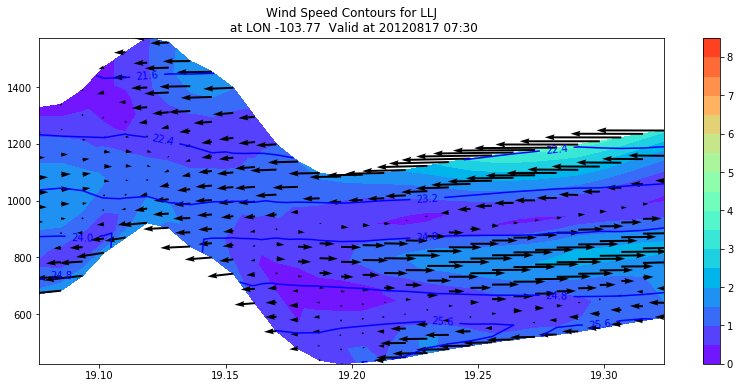

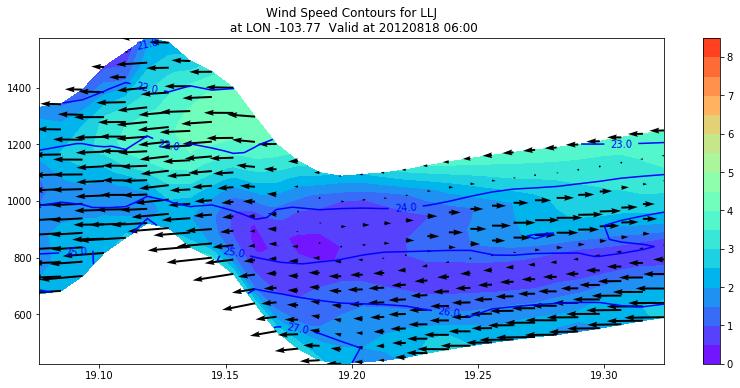

In [21]:
ln, ztop = 21, 12
f='../../../../../d03/20120816_d03_gfs05_p1r1.nc'
uv30, wd30, tv30, p30, z30, ua30, va30, wa30 = wrf30m(f=f,tt=39, ztop=ztop)
hovtslon(ln=ln,ztop=ztop)
#hovtslon(tt=3*36,ln=ln,ztop=ztop)
#hovtslon(tt=3*42,ln=ln,ztop=ztop)
uv30, wd30, tv30, p30, z30, ua30, va30, wa30 = wrf30m(f=f,tt=84, ztop=ztop)
hovtslon(ln=ln,ztop=ztop)
#hovtslon(tt=3*86,ln=ln,ztop=ztop)
#hovtslon(tt=3*92,ln=ln,ztop=ztop)

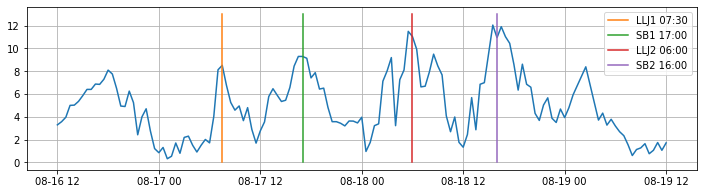

In [22]:
plt.figure(figsize=(12,3))
plt.plot(sodarw.iloc[:,3])
pp=14
plt.plot([np.datetime64('2012-08-17 07:30')]*pp, np.arange(pp), label='LLJ1 07:30')
plt.plot([np.datetime64('2012-08-17 17:00')]*pp, np.arange(pp), label='SB1 17:00')
plt.plot([np.datetime64('2012-08-18 06:00')]*pp, np.arange(pp), label='LLJ2 06:00')
plt.plot([np.datetime64('2012-08-18 16:00')]*pp, np.arange(pp), label='SB2 16:00')
plt.legend()
#uu, vv = np.cos(sodard.iloc[::6,3].values), np.sin(sodard.iloc[::6,3].values)
#plt.quiver(uu, vv)
plt.grid()
#sodard.iloc[::6,3]

2 spd_100 100.0


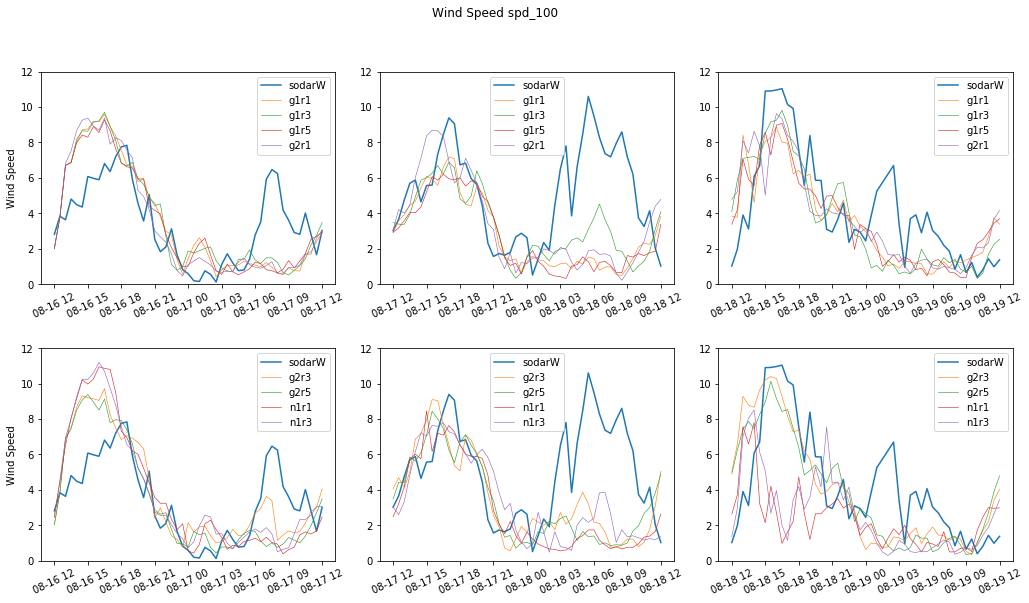

In [23]:
panelPlot2(level=2)


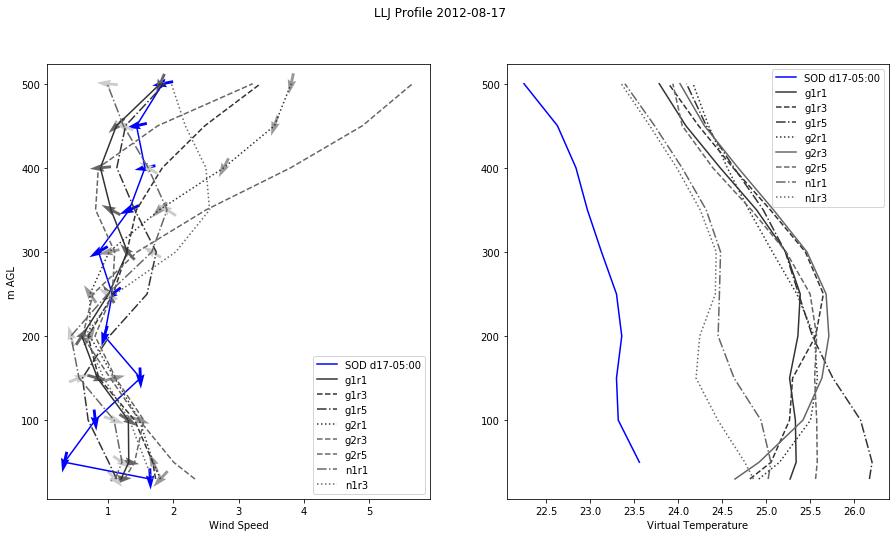

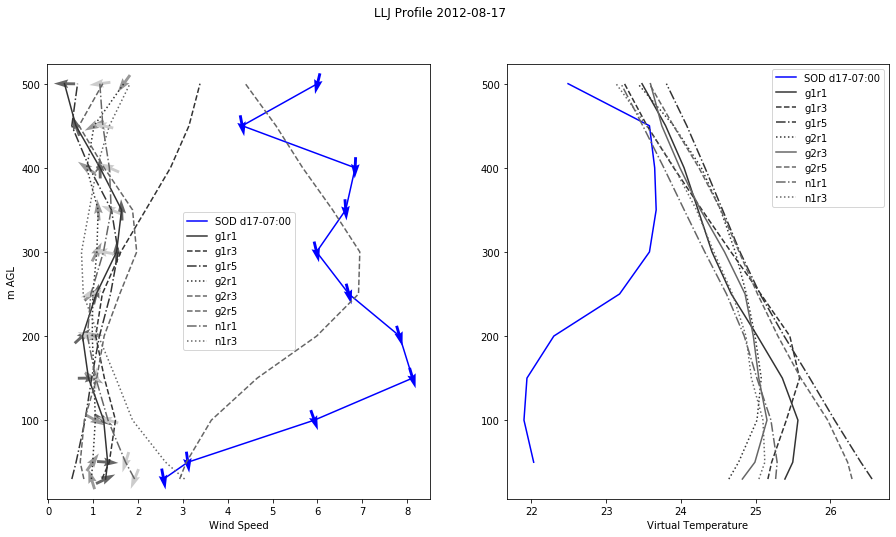

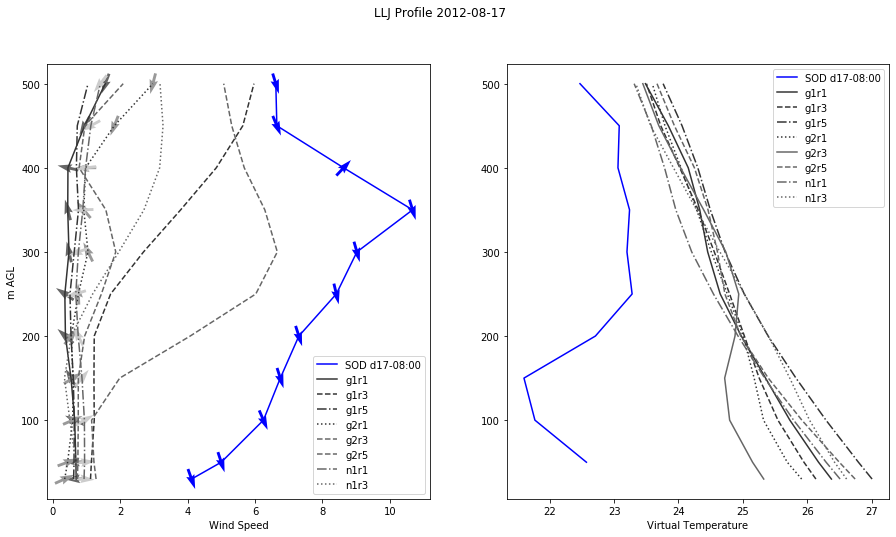

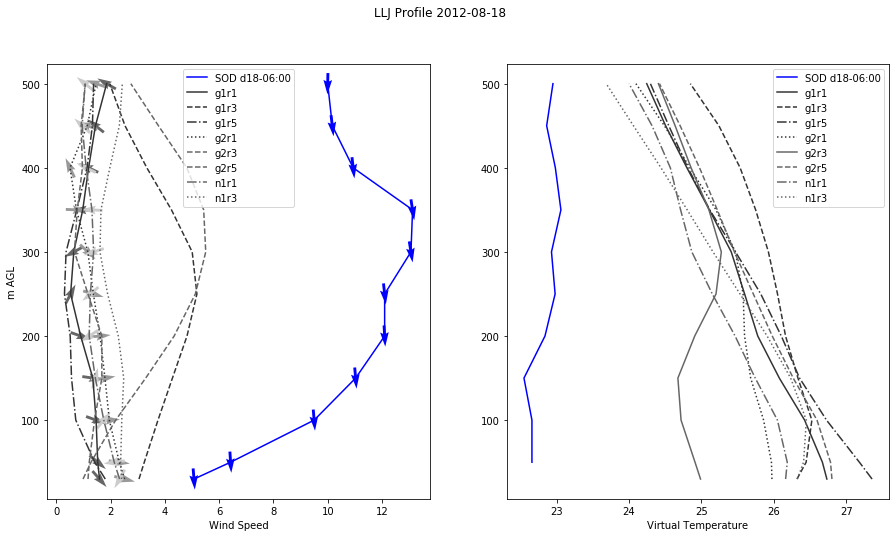

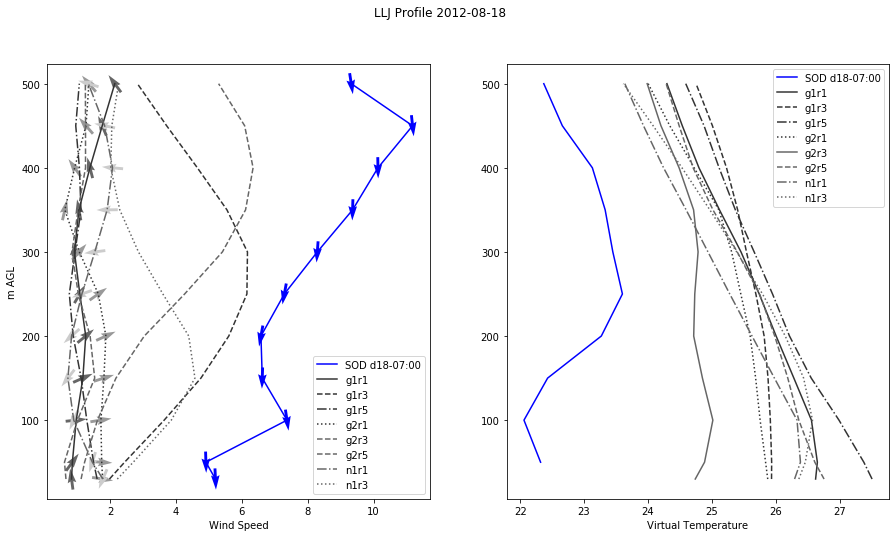

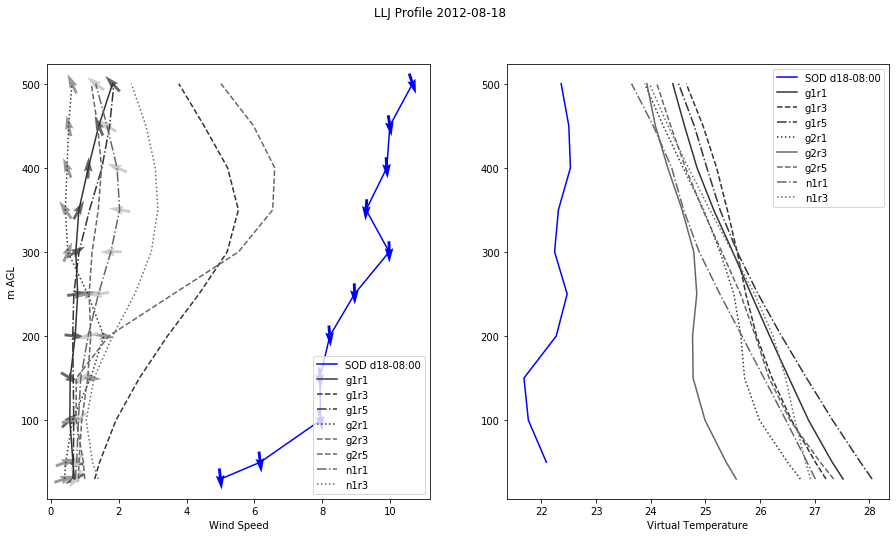

In [24]:
ProfilesPanel1(tt=34)
plt.suptitle('LLJ Profile 2012-08-17');
ProfilesPanel1(tt=38)
plt.suptitle('LLJ Profile 2012-08-17');
ProfilesPanel1(tt=40)
plt.suptitle('LLJ Profile 2012-08-17');
print('\n\n')

ProfilesPanel1(tt=48+36)
plt.suptitle('LLJ Profile 2012-08-18');
ProfilesPanel1(tt=48+38)
plt.suptitle('LLJ Profile 2012-08-18');
ProfilesPanel1(tt=48+40)
plt.suptitle('LLJ Profile 2012-08-18');


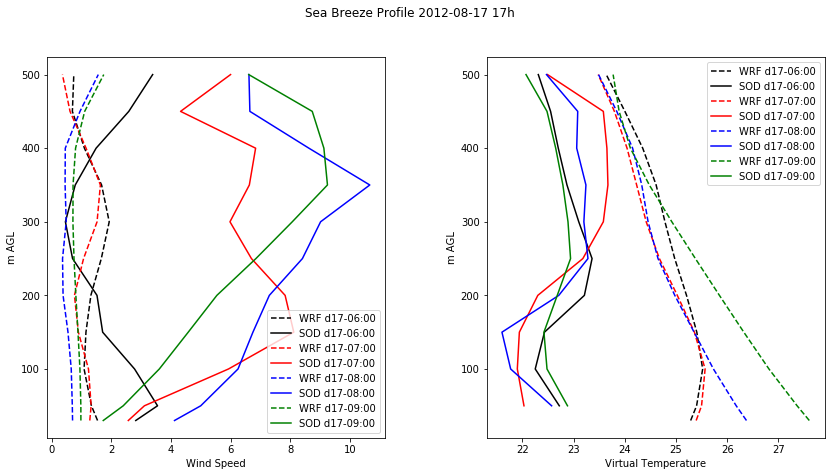

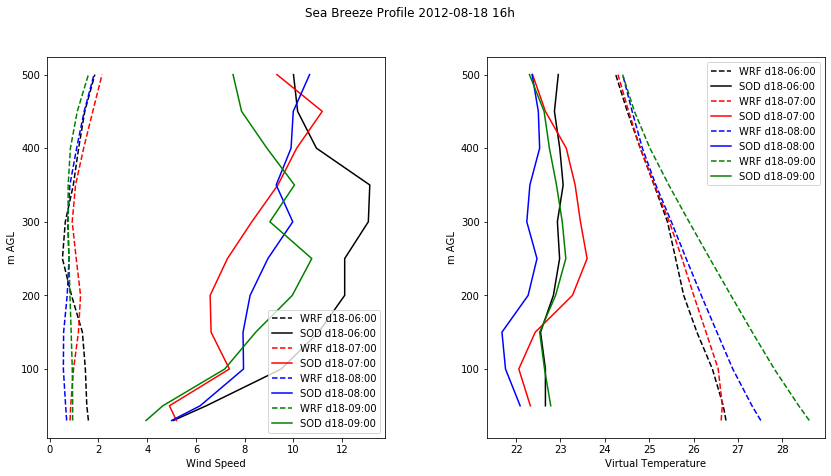

In [25]:
ProfilesPanel2(36,43,2,wrf1)
plt.suptitle('Sea Breeze Profile 2012-08-17 17h');
#plt.savefig('figs/Sea Breeze d17_17h_png', dpi=300)
ProfilesPanel2(84,91,2,wrf2)
plt.suptitle('Sea Breeze Profile 2012-08-18 16h');

In [26]:
print('Finish')

Finish
